<a href="https://colab.research.google.com/github/Vijaya-1621/Vijaya_16/blob/main/Sentimantal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis



In [6]:
pip install pandas

In [29]:
import pandas as pd
data = pd.read_csv('/content/Reviews (1).csv', encoding='latin-1')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [30]:
data.head()#first 5 rows(-ve and +ve comments)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [31]:
data.tail()#last 5 rows(all are nagative)

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
data.info()#analyze the info of data set

object is a string (catogorical column)
int64



In [32]:
data.describe() #statistical info of dataset

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [33]:
#checking the null values of datasets
data.isnull().sum()

,0
Review,0
Liked,0


there is no null values in this dataset if there is a null values in the dataset

In [34]:
data.duplicated()
#false indicates no duplicates
#removing duplicates datacleaning

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [35]:
value_counts = data['Liked'].value_counts()
value_counts

,count
Liked,
1,500
0,500


+ve are 500
-ve are 500
amnong 1000

In [36]:
pip install matplotlib

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

#these libraries used for data visualization

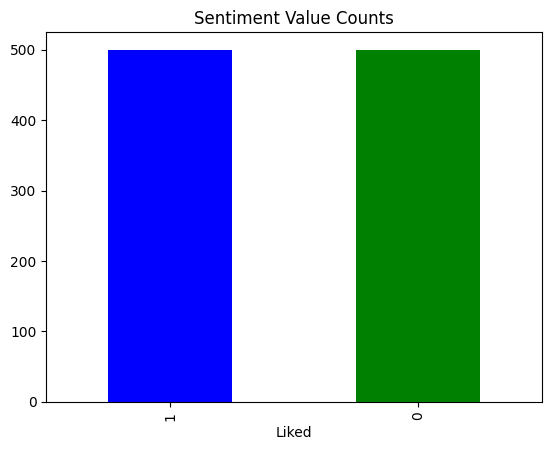

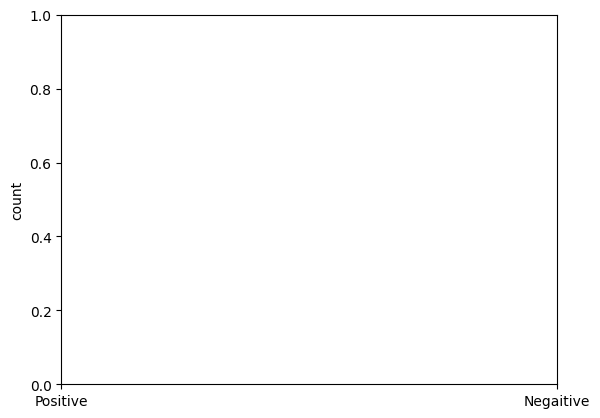

In [41]:
value_counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Sentiment Value Counts")
plt.xlabel('Liked')
plt.show()
plt.ylabel('count')
plt.xticks(ticks=[0,1],labels=['Positive','Negaitive'],rotation=0)
plt.show()

In [44]:
from wordcloud import WordCloud

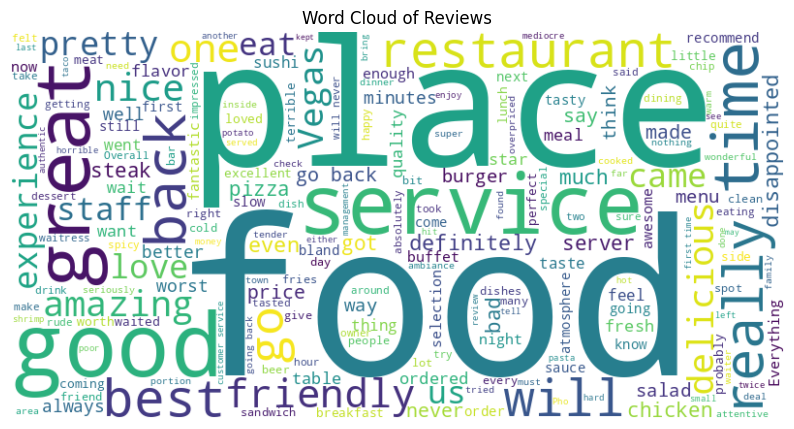

In [45]:
combined_text="".join(data['Review'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

food,place,service are repeatdly occurs

In [46]:
from collections import Counter

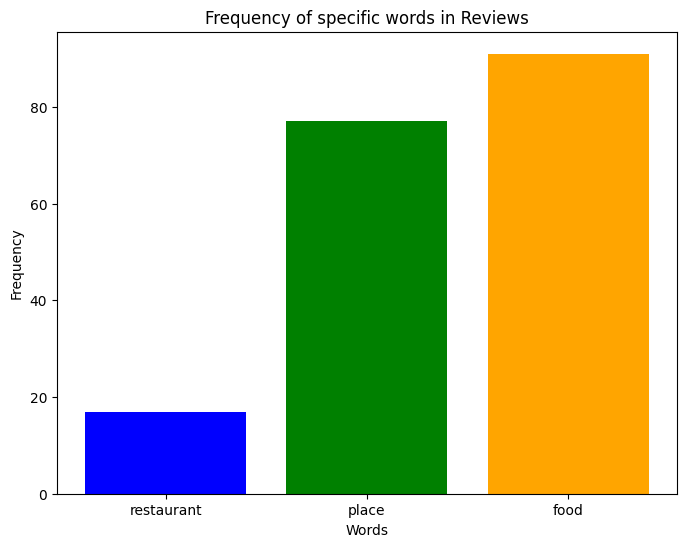

In [47]:
target_words={'food','place','restaurant'}
all_words=" ".join(data['Review']).lower().split()
word_counts=Counter(all_words)
target_word_counts={word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values() , color=['blue','green','orange'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in Reviews')
plt.show()

sentiment analysis on text data......based on how many times it repeated

In [49]:
#Text preprocessing
#convert a dataset into lower case
lowercased_text=data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [50]:
#step2
#Tokenization
#Tokenization is the processs of converting the whole sentance will convert into the small pieces of text
from nltk.tokenize import word_tokenize

In [51]:
import nltk
nltk.download('punkt')
data['Tokens']=data['Review'].apply(word_tokenize)
print(data['Tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [55]:
#step3
#Removing the stop words like this,is,are,was
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
stop_words=set(stopwords.words('english'))
data['Tokens']=data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [58]:
#stemming
#Stemming is the process of reducing the word into root or base word form by removing suffix
#example: driving stemmed is drive
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
data['stemmed']=data['Review'].apply(lambda x: " ".join(stemmer.stem(word) for word in word_tokenize(x)))
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [59]:
data['stemmed'].value_counts()

,count
stemmed,
# name ?,4
the food wa terribl .,2
i would not recommend thi place .,2
i love thi place .,2
i wo n't be back .,2
...,...
"omg , the food wa delicioso !",1
there is noth authent about thi place .,1
the spaghetti is noth special whatsoev .,1


In [60]:
#lemmatization
#lemmatization is the process transforming a word into its base or dictionary form
#example is better is lemmtized to
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [61]:
lemmatizer=WordNetLemmatizer()
data['Lemmatized']=data['Review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word,pos=wordnet.VERB)for word in word_tokenize(x)]))
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [62]:
#the food is good i have visited 8 times or 7 times
#Removing the numbers from reviews
import re
data['No_Numbers']= data['Review'].apply(lambda x:re.sub(r'\d+',' ',x))
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [63]:
#removing special characters like @,#,$,%,*
data['cleaned']=data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','',x))
print(data['cleaned'])

0                                   Wow Loved this place
1                                      Crust is not good
2               Not tasty and the texture was just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly gone
997    Overall I was not impressed and would not go back
998    The whole experience was underwhelming and I t...
999    Then as if I hadnt wasted enough of my life th...
Name: cleaned, Length: 1000, dtype: object


In [64]:
#expanding method
# don't eat food in this hotel, when we apply expanded text it will convert into do not eat food in this hotel

In [66]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.6 MB/s eta 0:00:00


In [67]:
import contractions
data['Expanded']= data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [68]:
#Removing emojis
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.3 MB/s eta 0:00:00


In [69]:
import emoji
data['emoji']=data['Review'].apply(emoji.demojize)
print(data['emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [70]:
#removing likes from review_text
#food is good visit www.abchotel.in
!pip install beautifulsoup4
from bs4 import BeautifulSoup
data['cleaned']=data['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


<ipython-input-70-afa56abd72d7>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned']=data['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())


In [71]:
#TF IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
print(X.toarray())
X=vectorizer.fit_transform(data['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [74]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(data['Review'])
y= data['Liked']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics  # Import the metrics module

vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(data['Review'])
y= data['Liked']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=MultinomialNB()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred) # Use metrics.accuracy_score
report=metrics.classification_report(y_test,y_pred) # Use metrics.classification_report
print(f'Accuracy {accuracy}')

Accuracy 0.8


In [79]:
print(f'Classification Report')
print(report)  # Change 'Report' to 'report'

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [93]:
import string

In [97]:
import string
from bs4 import BeautifulSoup
import re
import contractions
import emoji
from nltk.tokenize import word_tokenize # Import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#prediction of new review
def preprocess_review(review):
  review=review.lower()
  review=BeautifulSoup(review,"html.parser").get_text()
  review=re.sub(f"[{string.punctuation}]"," ",review)
  review=contractions.fix(review)
  review=emoji.demojize(review)
  tokens=word_tokenize(review) # Use the imported word_tokenize function
  stop_words=set(stopwords.words('english'))
  tokens=[word for word in tokens if word not in stop_words]
  stemmer=PorterStemmer()
  stemmed_tokens=[stemmer.stem(word) for word in tokens]
  lemmatizer=WordNetLemmatizer()
  lemmatized_tokens=[lemmatizer.lemmatize(word,pos='v') for word in tokens]
  cleaned_review=''.join(lemmatized_tokens)
  return cleaned_review

In [98]:
#new review prediction
new_review=input("Enter your review:")
cleaned_review=preprocess_review(new_review)
new_review_vectorized=vectorizer.transform([cleaned_review])
prediction=model.predict(new_review_vectorized)
if prediction[0]==1:
  print("The review is predicted Positive")
else:
  print("The review is predicted Negative")

Enter your review:good
The review is predicted Positive


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data)
#print(X
print(X.toarray())
print(vectorizer.get_feature_names_out())
#print(tfidf_matrix.toarray())
#print(vectorizer.get_feature_names_out())

[[0.         0.48829139 0.         0.         0.60313701 0.
  0.         0.         0.48829139 0.39921021 0.        ]
 [0.58783765 0.         0.         0.         0.46345796 0.
  0.         0.58783765 0.         0.30675807 0.        ]
 [0.         0.37455072 0.         0.58680608 0.         0.
  0.         0.         0.37455072 0.61243951 0.        ]
 [0.         0.25411074 0.39811358 0.         0.         0.39811358
  0.39811358 0.         0.50822148 0.20775218 0.39811358]]
['blue' 'bright' 'can' 'in' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']


In [103]:
print(X.toarray())

[[0.         0.48829139 0.         0.         0.60313701 0.
  0.         0.         0.48829139 0.39921021 0.        ]
 [0.58783765 0.         0.         0.         0.46345796 0.
  0.         0.58783765 0.         0.30675807 0.        ]
 [0.         0.37455072 0.         0.58680608 0.         0.
  0.         0.         0.37455072 0.61243951 0.        ]
 [0.         0.25411074 0.39811358 0.         0.         0.39811358
  0.39811358 0.         0.50822148 0.20775218 0.39811358]]
